In [1]:
# Import pandas and pyplot
import pandas as pd
from matplotlib import pyplot as plt

<function matplotlib.pyplot.show(*args, **kw)>

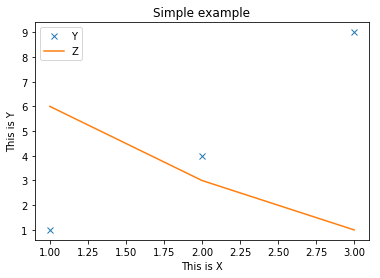

In [2]:
# Make a simple line plot
# Add another line
# Add title, x/y lables and legend
x=[1,2,3]
y=[1,4,9]
z=[6,3,1]
plt.plot(x,y,"x")
plt.plot(x,z)
plt.xlabel("This is X")
plt.ylabel("This is Y")
plt.title("Simple example")
plt.legend(["Y","Z"])
plt.show


In [3]:
# Import "worldcountries.csv"
# print top 5 rows

df=pd.read_csv("worldcountries.csv")
df.head()

,Unnamed: 0,Country,Region,ISO,Year,AverageHoursWorked,Employment,EmploymentGrowth,GDPEKS,GDPGrowth,OutputPerEmployedPerson,OutputPerEmployedPersonGrowth,OutputPerHourWorked,OutputPerHourWorkedGrowth,PerCapitaIncome,PerCapitaIncomeGrowth,Population,PopulationGrowth,TotalHours,TotalHoursGrowth
0,0,Albania,Central and Eastern Europe and Central Asia,ALB,1950,NaN,496,NaN,2398.0,NaN,4839.0,NaN,NaN,NaN,1954.0,NaN,1227,1.0,NaN,NaN
1,1,Albania,Central and Eastern Europe and Central Asia,ALB,1951,NaN,506,2.0,2557.0,6.6,5057.0,4.5,NaN,NaN,2039.0,4.3,1254,2.2,NaN,NaN
2,2,Albania,Central and Eastern Europe and Central Asia,ALB,1952,NaN,516,2.0,2619.0,2.4,5079.0,0.4,NaN,NaN,2042.0,0.2,1283,2.3,NaN,NaN
3,3,Albania,Central and Eastern Europe and Central Asia,ALB,1953,NaN,526,2.0,2793.0,6.6,5309.0,4.5,NaN,NaN,2124.0,4.0,1315,2.5,NaN,NaN
4,4,Albania,Central and Eastern Europe and Central Asia,ALB,1954,NaN,537,2.0,2959.0,5.9,5514.0,3.9,NaN,NaN,2187.0,2.9,1353,2.9,NaN,NaN


In [4]:
# check the df shape, describe variables types,unique values
df.shape
df.describe()
df.dtypes
len(df.Country.unique())

123

# Pie chart

In [5]:
# check 2018 Country count group by Region and save it in "CountryCount"
CountryCount=df[df.Year==2018].groupby('Region').Country.count()
CountryCount

Region
Africa                                         25
Asia                                           17
Central and Eastern Europe and Central Asia    28
Latin America                                  17
Middle East                                    12
North America                                   2
Oceania                                         2
Western Europe                                 20
Name: Country, dtype: int64

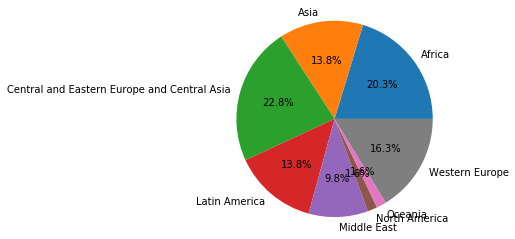

In [6]:
# make a pie chart show label and percentage (autopct='%1.1f%%')
plt.pie(CountryCount,labels=CountryCount.index,autopct='%1.1f%%')
plt.axis('equal')
plt.rcParams["figure.figsize"]=8,4
plt.show()



In [7]:
# Your turn: check 2018 Population sum by Region and save it in "Pop_By_Region" 
Pop_By_Region=df[df.Year==2018].groupby('Region').Population.sum()
Pop_By_Region

Region
Africa                                         1116330
Asia                                           3928551
Central and Eastern Europe and Central Asia     495145
Latin America                                   574101
Middle East                                     244563
North America                                   367239
Oceania                                          29727
Western Europe                                  427746
Name: Population, dtype: int64

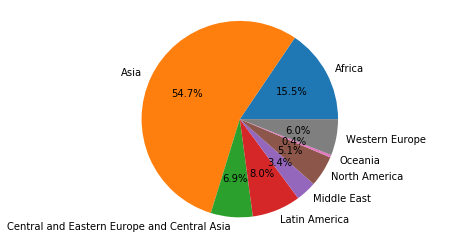

In [8]:
# Make a pie chart with "Pop_By_Region" (plt.pie(data,labels))
plt.pie(Pop_By_Region,labels=Pop_By_Region.index,autopct='%1.1f%%')
plt.axis('equal') 
plt.show()


# Bar chart

In [9]:
# Calculate "GDPEKS" sum by region for 2018 and save the result in "GDP_By_Region" (data in millions, make it in billions)
GDP_By_Region=(df[df.Year==2018].groupby('Region').GDPEKS.sum()).sort_values()
GDP_By_Region

Region
Oceania                                         1469210.0
Africa                                          6202403.0
Middle East                                     6234000.0
Latin America                                   9396593.0
Central and Eastern Europe and Central Asia    11300199.0
Western Europe                                 19129546.0
North America                                  21876828.0
Asia                                           54743270.0
Name: GDPEKS, dtype: float64

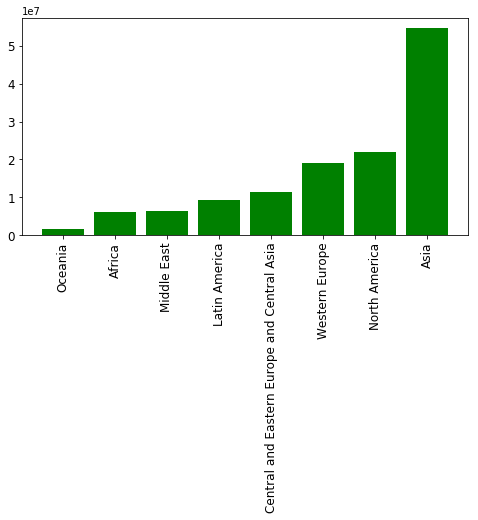

In [10]:
# Make a bar chart with "GDP_By_Region" (plt.bar(x,y), xticks to rotate)
plt.bar(GDP_By_Region.index,GDP_By_Region,color='g')
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Line Chart

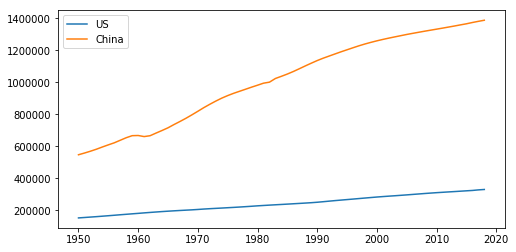

In [11]:
# Make a line chart to compare US, China Population over the years and add legend(plt.plot(x,y))
US=df[df.Country=='United States']
China=df[df.Country=='China']
plt.plot(US.Year,US.Population)
plt.plot(China.Year,China.Population)
plt.legend(['US','China'])
plt.show()

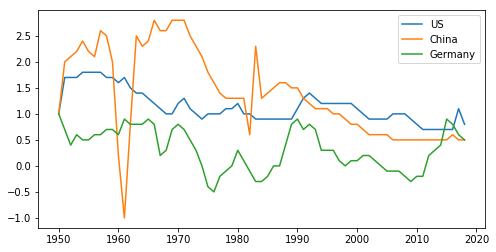

In [12]:
# Your turn: Plot Germany, China, US "PopulationGrowth" over the years 
US=df[df.Country=='United States']
China=df[df.Country=='China']
Germany=df[df.Country=='Germany']
plt.plot(US.Year,US.PopulationGrowth)
plt.plot(China.Year,China.PopulationGrowth)
plt.plot(China.Year,Germany.PopulationGrowth)
plt.legend(['US','China','Germany'])
plt.show()


# Histgram

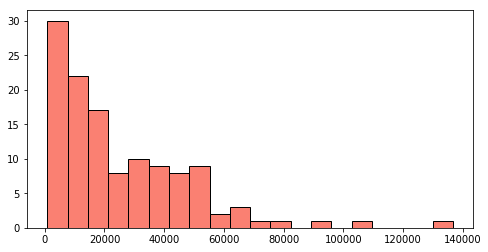

In [13]:
# Make a histgram for 2018 "PerCapitaIncome" (plt.hist(data,bins), plt.rcParams['axes.xmargin']=0)
GDP2018=df[df.Year==2018].PerCapitaIncome
plt.hist(GDP2018,bins=20,color='salmon',edgecolor='black')
plt.rcParams['axes.xmargin'] = 0
plt.show()
#plt.savefig('bars.png')

In [14]:
Rich=df[(df.Year==2018) & (df.PerCapitaIncome>60000)]

Rich[['Country','Region','PerCapitaIncome']].sort_values(by='PerCapitaIncome',ascending=False)

,Country,Region,PerCapitaIncome
5933,Qatar,Middle East,136762.0
4346,Luxembourg,Western Europe,103662.0
6347,Singapore,Asia,90134.0
7865,United Arab Emirates,Middle East,75681.0
5450,Norway,Western Europe,71982.0
4070,Kuwait,Middle East,68527.0
3518,Ireland,Western Europe,67358.0
3035,Hong Kong,Asia,63769.0
7037,Switzerland,Western Europe,61103.0
8003,United States,North America,60877.0


# Subplot

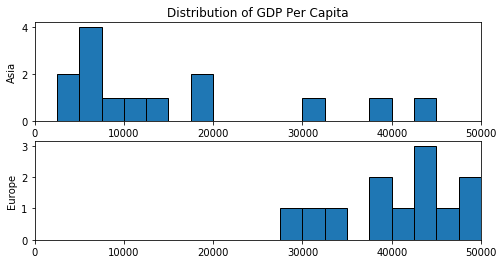

In [15]:
# Make subplots to compare "Asia" and "West Europe" "PerCapitaIncome"
asia_2018 = df[(df.Region == 'Asia') & (df.Year==2018)]
europe_2018 = df[(df.Region == 'Western Europe') & (df.Year==2018)]


plt.subplot(2, 1, 1) # subplot(211)
plt.title('Distribution of GDP Per Capita')
plt.hist(asia_2018['PerCapitaIncome'], 20, range=(0, 50000), edgecolor='black')
plt.ylabel('Asia')
plt.subplot(2, 1, 2)
plt.hist(europe_2018['PerCapitaIncome'], 20, range=(0, 50000), edgecolor='black')
plt.ylabel('Europe')
plt.show()

# Scatter Plot

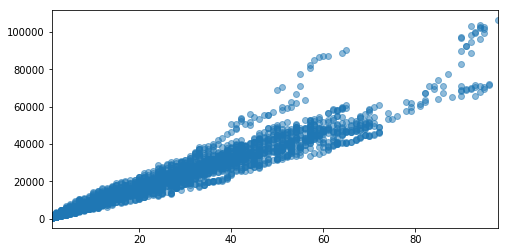

In [18]:
# Your turn: make a scatter plot for OutputPerHourWorked and df.PerCapitaIncome
plt.scatter(df.OutputPerHourWorked,df.PerCapitaIncome,alpha=.5)



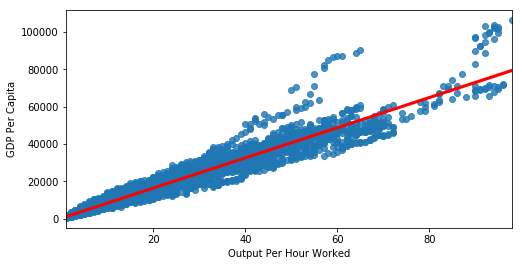

In [21]:
# Add a regression line to the scatter plot with Seaborn
import seaborn as sns
sns.regplot(x=df.OutputPerHourWorked, y=df.PerCapitaIncome, line_kws={"color":"r","alpha":1,"lw":3})

plt.xlabel('Output Per Hour Worked')
plt.ylabel('GDP Per Capita')

plt.show()


# Box plot

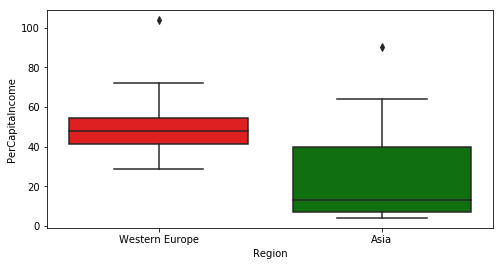

In [25]:
# Make a boxplot to compare 2018 Asia and Europe PerCapitaIncome
Asia_Europe=df[((df.Region=='Asia') | (df.Region=='Western Europe'))& (df.Year==2018)]
my_color={"Asia":"g","Western Europe":'r'}
sns.boxplot( x=Asia_Europe.Region, y=Asia_Europe["PerCapitaIncome"]/10**3, palette=my_color)